<a href="https://colab.research.google.com/github/s8narnor/Energy_Used/blob/main/EngMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocesssing**

In [ ]:
#importing all essential libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

import sys
oldsyaatdout = sys.stdout

class flushfile():
    def __init__(self, f):
        self.f = f
    def __getattr__(self, name):
        return object.__getattribute__(self.f, name)
    def write(self, x):
        self.f.write(x)
        self.f.flush()
    def flush(self):
        self.f.flush()
sys.stdout = flushfile(sys.stdout)

In [ ]:
#mounting drive

%cd "/content/drive/MyDrive/CSV Files"

/content/drive/MyDrive/CSV Files


In [ ]:
#import the data

eng_data = pd.read_excel("EngData.xlsx")

eng_data

,Enguse,GDP,TotlPop,ExportsGS,ImportsGS
0,267.347563,67350988021,567868018,2469898946,2695656848
1,267.308741,71463193830,581087256,2878172458,2650505782
2,268.602742,85515269586,594770134,3599135190,4039170800
3,272.713549,99525899116,608802600,4808415668,5992025678
4,275.907785,98472796457,623102897,5560820024,6545404119
5,280.447908,102717000000,637630087,6868196413,6280836401
6,281.947667,121487000000,652408776,7754744526,7611094891
7,279.380860,137300000000,667499806,8670273695,9045599669
8,285.537777,152992000000,682995354,10326383042,12498142737
9,286.163830,186325000000,698952844,11439539834,17225826069


In [ ]:
eng_data.isnull() 

,Enguse,GDP,TotlPop,ExportsGS,ImportsGS
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
#data statistics

eng_data.describe()

,Enguse,GDP,TotlPop,ExportsGS,ImportsGS
count,44.000000,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01
mean,384.956876,5.536812e+11,9.235673e+08,9.883169e+10,1.167297e+11
std,103.783309,5.587413e+11,2.248052e+08,1.443553e+11,1.735260e+11
min,267.308741,6.735099e+10,5.678680e+08,2.469899e+09,2.650506e+09
25%,296.998394,1.989090e+11,7.280259e+08,1.187846e+10,1.653623e+10
50%,363.796424,3.087840e+11,9.183554e+08,2.647632e+10,2.752954e+10
75%,428.146511,6.330615e+11,1.116048e+09,9.979077e+10,1.061312e+11
max,636.570156,2.039130e+12,1.295604e+09,4.721800e+11,5.713070e+11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f500fbdac90>,
      dtype=object)

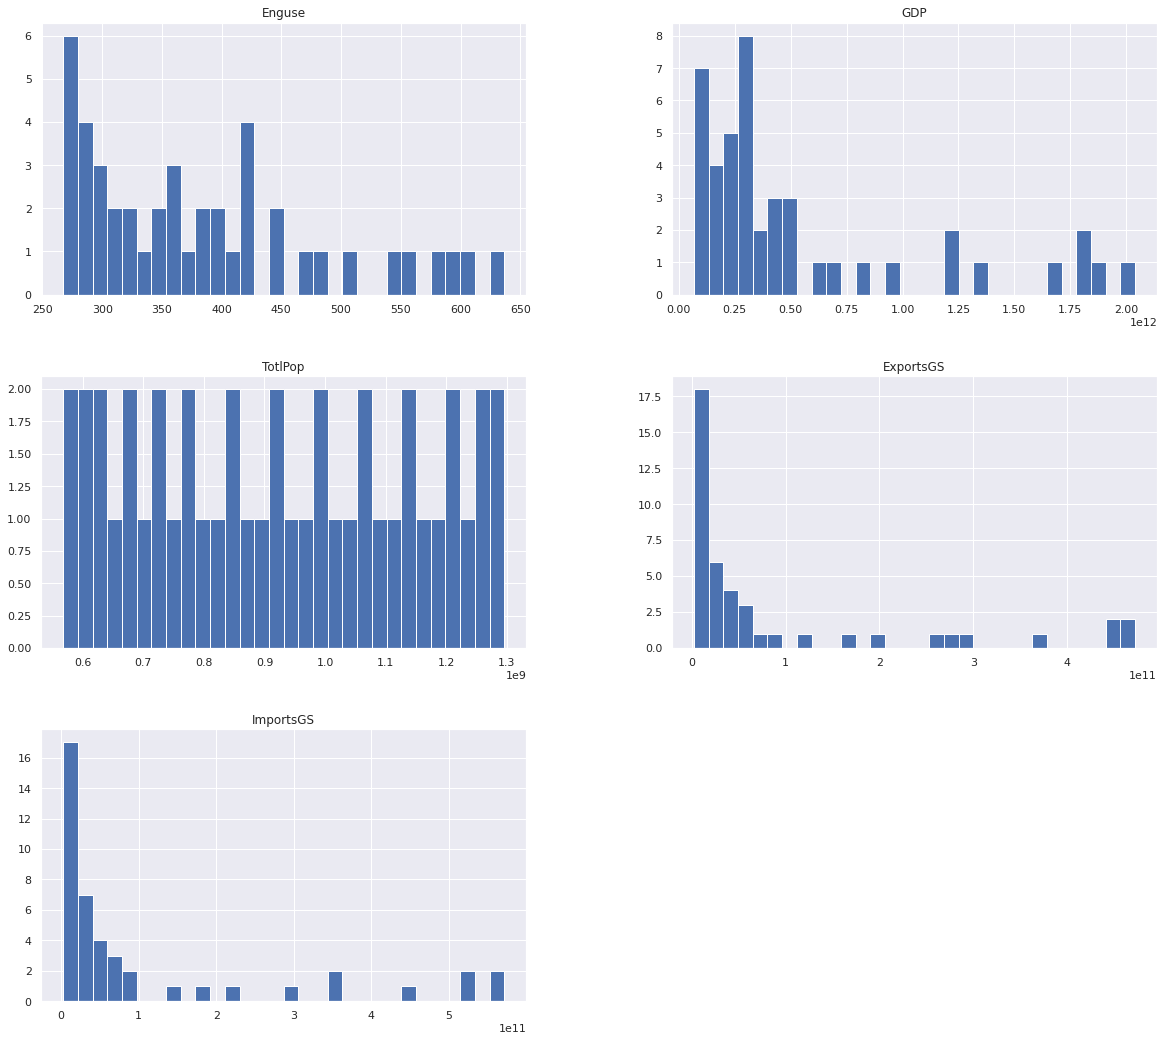

In [ ]:
#histogram

eng_data.hist(bins = 30, figsize=(20,18))

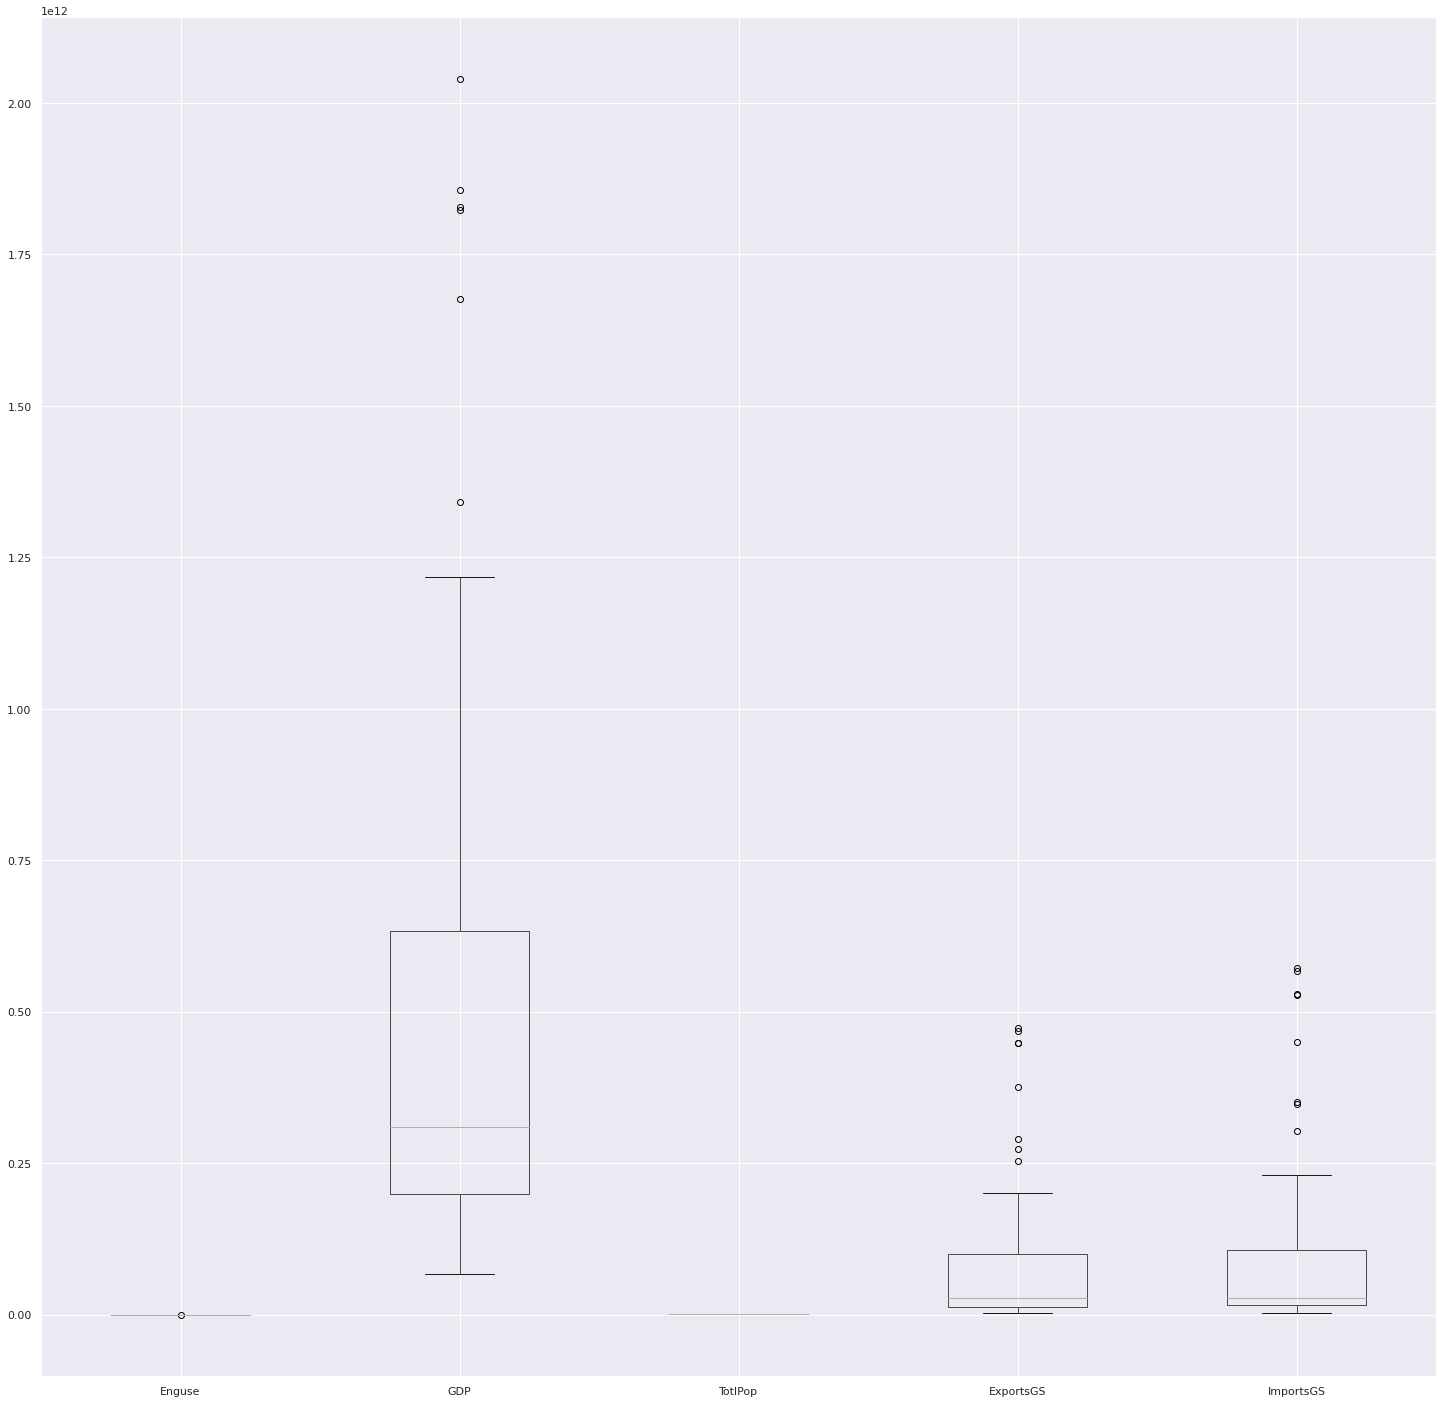

In [ ]:
#boxplot

eng_data.boxplot(figsize=(25,25))

In [ ]:


train_labels = eng_data.copy(deep = True).drop(['Enguse'], axis = 1)
Enguse_train = eng_data["Enguse"]

train_labels

,GDP,TotlPop,ExportsGS,ImportsGS
0,67350988021,567868018,2469898946,2695656848
1,71463193830,581087256,2878172458,2650505782
2,85515269586,594770134,3599135190,4039170800
3,99525899116,608802600,4808415668,5992025678
4,98472796457,623102897,5560820024,6545404119
5,102717000000,637630087,6868196413,6280836401
6,121487000000,652408776,7754744526,7611094891
7,137300000000,667499806,8670273695,9045599669
8,152992000000,682995354,10326383042,12498142737
9,186325000000,698952844,11439539834,17225826069


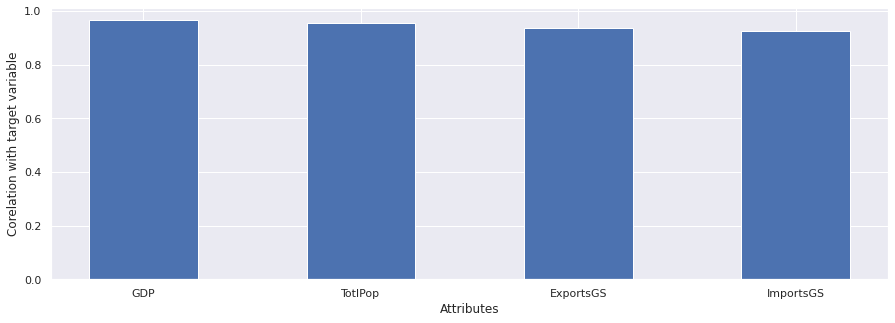

In [ ]:
corr = eng_data.corr('pearson')   #to get the corelation between features and target variable
corrs = [abs(corr[attr]['Enguse']) for attr in list(train_labels)]
l = list(zip(corrs,list(train_labels)))
l.sort(key = lambda x : x[0], reverse=True)
corrs, labels = list(zip((*l)))
index = np.arange(len(labels))
plt.figure(figsize = (15,5))
plt.bar(index, corrs, width =0.5)
plt.xlabel('Attributes')
plt.ylabel('Corelation with target variable')
plt.xticks(index,labels)
plt.show()

In [ ]:
#Correlation with output variable
corr = eng_data.corr()
cor_target = abs(corr['Enguse'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Enguse       1.000000
GDP          0.964205
TotlPop      0.956072
ExportsGS    0.934222
ImportsGS    0.926598
Name: Enguse, dtype: float64

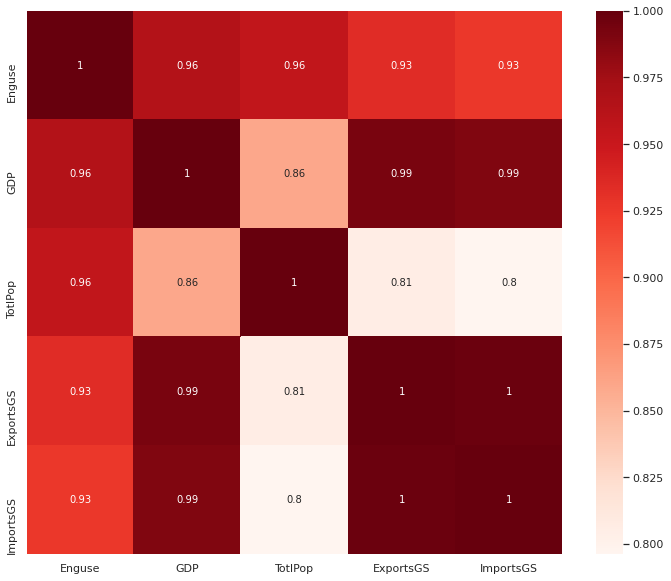

In [ ]:
#heatmap

#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = eng_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#**SVR (1,4)**

##**Enguse v/s GDP**

In [ ]:
X = eng_data.iloc[:, 1].values
y = eng_data.iloc[:, 0].values
y = np.array(y).reshape(-1,1)

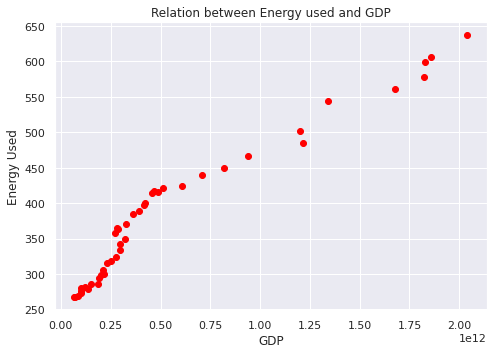

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y, color = 'red')
plt.title('Relation between Energy used and GDP')
plt.xlabel('GDP')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
y_true = sc_y.inverse_transform(y_test.reshape(-1))

df = pd.DataFrame({'Real Values':y_true, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,364.514502,336.547473
1,544.626598,508.931910
2,334.256828,343.086533
3,449.765856,471.648444
4,399.498831,390.534236
5,424.294346,445.386353
6,272.713549,281.634160
7,281.947667,286.466240
8,306.066708,312.579151


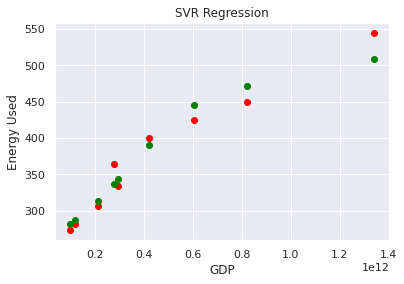

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('GDP')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_true, y_pred)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 16.04247112184206
MSE: 364.5244745811378
RMSE: 19.092524049510526
R-Squared: 0.9479543574201348


##**Enguse v/s TotPop**

In [ ]:
X = eng_data.iloc[:, 2].values
y = eng_data.iloc[:, 0].values
y = np.array(y).reshape(-1,1)

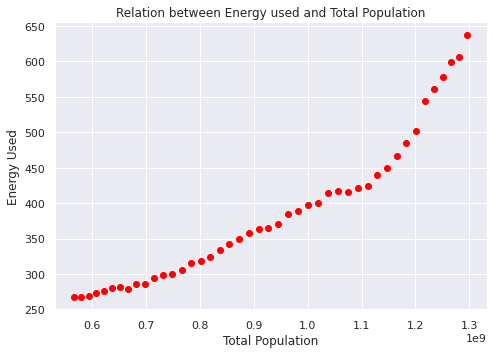

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y, color = 'red')
plt.title('Relation between Energy used and Total Population')
plt.xlabel('Total Population')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
y_true = sc_y.inverse_transform(y_test.reshape(-1))

df = pd.DataFrame({'Real Values':y_true, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,544.626598,534.167415
1,314.898047,321.490198
2,350.075734,358.278168
3,421.270490,423.034965
4,399.498831,394.544369
5,323.883122,336.830822
6,363.078346,369.951699
7,385.091857,382.986365
8,281.947667,278.625642


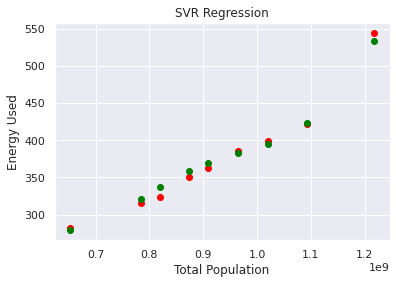

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Total Population')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_true, y_pred)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 6.35791943340115
MSE: 53.12731519907433
RMSE: 7.288848688172525
R-Squared: 0.9898813003982188


##**Enguse v/s ExportGS**

In [ ]:
X = eng_data.iloc[:, 3].values
y = eng_data.iloc[:, 0].values
y = np.array(y).reshape(-1,1)

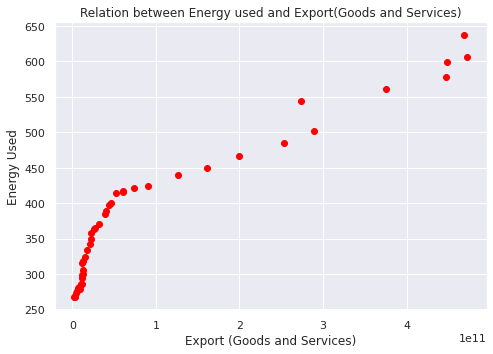

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y, color = 'red')
plt.title('Relation between Energy used and Export(Goods and Services)')
plt.xlabel('Export (Goods and Services)')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
y_true = sc_y.inverse_transform(y_test.reshape(-1))

df = pd.DataFrame({'Real Values':y_true, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,306.066708,320.695512
1,501.559635,517.140517
2,399.498831,373.260627
3,416.014444,394.653289
4,323.883122,324.303263
5,350.075734,335.420466
6,267.308741,304.916935
7,267.347563,304.323794
8,300.702227,319.780005


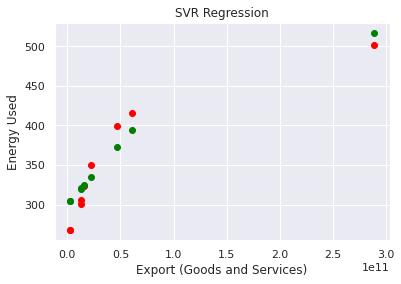

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Export (Goods and Services)')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_true, y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 20.727406230320305
MSE: 551.3378824238113
RMSE: 23.480585223196872
R-Squared: 0.8975968490830054


##**Enguse v/s ImportGS**

In [ ]:
X = eng_data.iloc[:, 4].values
y = eng_data.iloc[:, 0].values
y = np.array(y).reshape(-1,1)

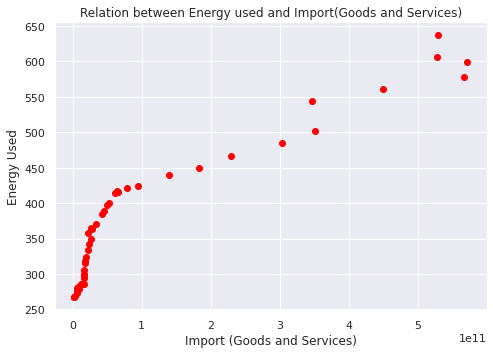

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X,y, color = 'red')
plt.title('Relation between Energy used and Import(Goods and Services)')
plt.xlabel('Import (Goods and Services)')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [ ]:
y_true = sc_y.inverse_transform(y_test.reshape(-1))

df = pd.DataFrame({'Real Values':y_true, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,272.713549,322.396365
1,286.163830,337.666279
2,318.867323,338.029661
3,306.066708,336.504856
4,439.703008,468.365204
5,314.898047,338.434793
6,285.537777,331.138176
7,561.653403,575.516256
8,267.347563,318.097223


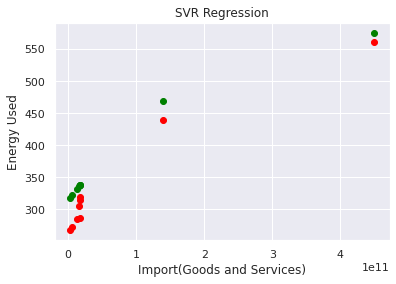

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Import(Goods and Services)')
plt.ylabel('Energy Used')
plt.show()

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y_true, y_pred)
mse = metrics.mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_true, y_pred)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 34.7997336720349
MSE: 1404.129257901355
RMSE: 37.47171276978616
R-Squared: 0.8358039654781408


#**SVR (2,6)**

##**Enguse v/s (GDP and TotPop)**

In [ ]:
X = eng_data.iloc[:, 1:3].values
y = eng_data.iloc[:, 0].values
y = np.array(y).reshape(-1,1)
X

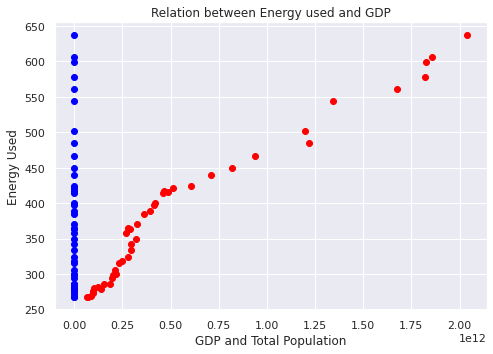

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(X[:,0],y, color = 'red')
ax.scatter(X[:,1],y, color = 'blue')
plt.title('Relation between Energy used and GDP')
plt.xlabel('GDP and Total Population')
plt.ylabel('Energy Used')
plt.show()

##**Enguse v/s (GDP and ExportGS)**

##**Enguse v/s (GDP and ImportGS)**

##**Enguse v/s (ImportGS and ExportGS)**

##**Enguse v/s (TotPop and ExportGS)**

##**Enguse v/s (TotPop and ImportGS)**

#**SVR (3,4)**

##**Enguse v/s (GDP, TotPop and ExportGS)**

##**Enguse v/s (GDP, TotPop and ImportGS)**

##**Enguse v/s (GDP, ExportGS and ImportGS)**

##**Enguse v/s (TotPop, ExportGS and ImportGS)**

#**SVR (4,1)**

##**Enguse v/s (GDP, TotPop, ExportGS and ImportGS)**